<a href="https://colab.research.google.com/github/tr3nt-tayl0r/CIMIS/blob/main/delta_ETo_monthly_avg_jun_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tr3nt-tayl0r/CIMIS.git

Cloning into 'CIMIS'...
remote: Enumerating objects: 10854, done.
remote: Counting objects: 100% (393/393), done.
remote: Compressing objects: 100% (361/361), done.
remote: Total 10854 (delta 34), reused 386 (delta 32), pack-reused 10461 (from 1)
Receiving objects: 100% (10854/10854), 654.81 MiB | 9.84 MiB/s, done.
Resolving deltas: 100% (2213/2213), done.
Updating files: 100% (4029/4029), done.


In [2]:
import glob
import os
import sys
import datetime
import numpy as np
import pandas as pd
import json
import requests
import datetime
import matplotlib.pyplot as plt
from google.colab import userdata
!pip install cartopy
import cartopy
import geopandas as gpd
!pip install refet
import math
import refet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 69.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for refet: filename=refet-0.4.2-py3-none-any.whl size=19274 sha256=601322fa9544e3ddc6ca4f26345cbd56e2e45a0433409031fb0f92422cd559d2
  Stored in directory: /root/.cache/pip/wheels/ab/55/da/7ed6e47f6fa1135fcdef373db6f974fd7515ee8e86c9662e88
Successfully built refet


(117, 59)


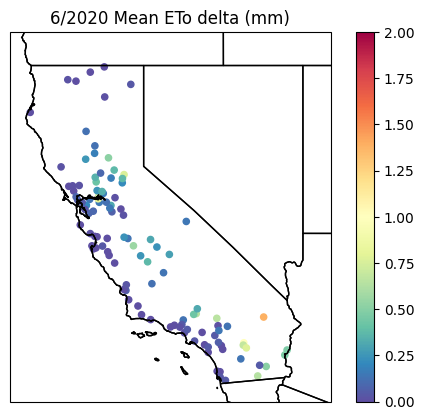

(117, 59)


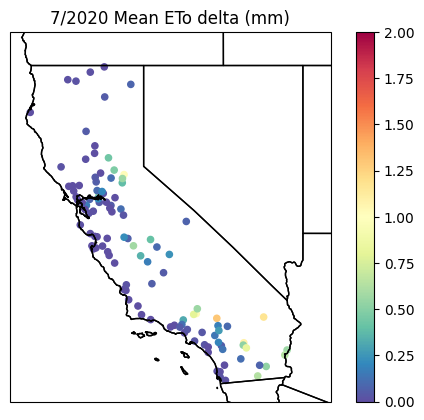

(117, 59)


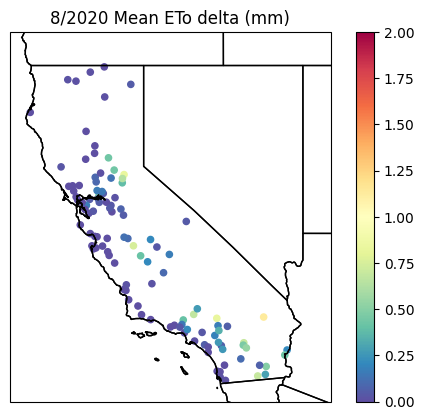

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point

def map_monthly_average(df, col, month, year):
  df['Date']=pd.to_datetime(df['Date'], format='mixed')
  df_monthly = df[(df['Date'].dt.month == month) & (df['Date'].dt.year == year)]
  print(df_monthly.shape)
  geometry = [Point(xy) for xy in zip(df_monthly['Long'], df_monthly['Lat'])]
  # Create a GeoDataFrame from the DataFrame and the list of Points
  geo_df = gpd.GeoDataFrame(df_monthly, geometry=geometry)
  # Set the coordinate reference system (CRS) for the GeoDataFrame
  geo_df.set_crs(epsg=4326, inplace=True)
  fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
  ax.set_extent([-125, -113, 32, 43], crs=ccrs.PlateCarree())

  # Add coastlines and borders
  ax.coastlines(resolution='10m')
  #ax.add_feature(cfeature.BORDERS)
  ax.add_feature(cfeature.STATES.with_scale('10m'))

  #norm = mcolors.Normalize(vmin=0, vmax=3, clip=False)
  geo_df.plot(ax=ax,  markersize=20, transform=ccrs.PlateCarree(), column=col, legend=True, cmap='Spectral_r',  vmin=0,vmax=2.0)
  # Display the
  plt.title(f"{month}/{year} Mean ETo delta (mm)")
  plt.show()

#map_monthly_average(df_month_concat, 'd_ETo_avg', 6, 2024)
dir = '/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/'
file = f'{dir}all_stations_daily_corr_MASTER.csv'
df_month_concat = pd.read_csv(file)

for year in range(2020,2021):
  for month in range(6,9):
    map_monthly_average(df_month_concat, 'd_ETo_avg', month, year)
